#  Dispersion de Taylor et Chromatographie

On injecte rapidement du pergamanate de potassium (D=1,87.10-9 m2/s) dans un tube capillaire de 1,5 m de longueur et de 0,5 mm de rayon interne. De l’eau circule dans ce tube avec une vitesse de 0,05 mm/s.

**1. Calculer l’étalement du traceur en sortie du tube**

>Lors de l'écoulement d'un traceur dans un tube, il y a un couplage entre la convection, u, la diffusion axiale et la diffusion radiale du traceur. Selon la valeur des différents temps caractéristiques de diffusion et de convection, il est possible de définir différents régimes pour le transport du traceur. Ces différents régimes peuvent être définis par rapport à la valeur du nombre de Péclet $Pe=\frac{ua}{D}$ et du rapport $\frac{L}{a}$. 

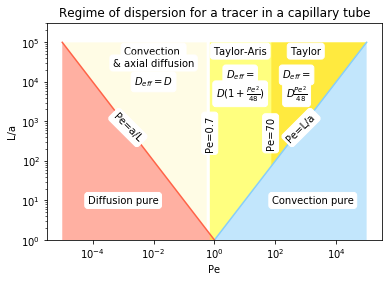

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

#Tracé du diagramme pour la dispersion 
def plotPe():
    Pe=np.logspace(-5,5,100)
    Pe_07=np.ones(len(Pe))*0.7
    Pe_70=np.ones(len(Pe))*70
    plt.loglog(Pe,Pe,'lightskyblue')
    plt.loglog(Pe,1/Pe, 'tomato')

    plt.fill_between(Pe, Pe, where=Pe>0, facecolor='lightskyblue', alpha=0.5)
    plt.fill_between(Pe, 1/Pe, where=Pe>1e-6, facecolor='tomato', alpha=0.5)
    plt.fill_between(Pe, 1/Pe,1e5, where=Pe<0.7, facecolor='lemonchiffon', alpha=0.5)
    plt.fill_between(Pe, Pe,1e5, where=Pe>0.7, facecolor='yellow', alpha=0.5)
    plt.fill_between(Pe, Pe, 1e5, where=Pe>70, facecolor='gold', alpha=0.5)

    plt.title('Regime of dispersion for a tracer in a capillary tube')
    #Annotation dans la figure
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=1)
    plt.text(700, 700, "Pe=L/a", ha="center", va="center", rotation=45, size=10, bbox=bbox_props)
    plt.text(1/700, 700, "Pe=a/L", ha="center", va="center", rotation=-45, size=10, bbox=bbox_props)
    plt.text(0.7, 500, "Pe=0.7", ha="center", va="center", rotation=90, size=10, bbox=bbox_props)
    plt.text(70, 500, "Pe=70", ha="center", va="center", rotation=90, size=10, bbox=bbox_props)
    plt.text(0.001, 10, "Diffusion pure", ha="center", va="center", size=10, bbox=bbox_props)
    plt.text(1700, 10, "Convection pure", ha="center", va="center", size=10, bbox=bbox_props)
    plt.text(0.01, 60000, "Convection ", ha="center", va="center", size=10, bbox=bbox_props)
    plt.text(0.01, 30000, "& axial diffusion", ha="center", va="center", size=10, bbox=bbox_props)  
    plt.text(7, 60000, "Taylor-Aris", ha="center", va="center", size=10, bbox=bbox_props)
    plt.text(1000, 60000, "Taylor", ha="center", va="center", size=10, bbox=bbox_props)
    plt.xlabel('Pe')
    plt.ylabel('L/a')
    plt.ylim(bottom=1.)
    
plotPe()
plt.text(0.01, 10000, "$D_{eff}=D$", ha="center", va="center", size=10, bbox=bbox_props)
plt.text(7, 15000, r'$D_{eff}=$', ha="center", va="center", size=10, bbox=bbox_props)
plt.text(7, 5000, r'$D(1+\frac{Pe^2}{48})$', ha="center", va="center", size=10, bbox=bbox_props)
plt.text(500, 15000, r'$D_{eff}=$', ha="center", va="center", size=10, bbox=bbox_props)
plt.text(500, 5000, r'$D\frac{Pe^2}{48}$', ha="center", va="center", size=10, bbox=bbox_props)
plt.show()

>Lorsque un traceur est injecté sous forme d'une impulsion :
>
>à t=0           $\quad\overline{c}=\frac{n_0}{\pi a^2}\delta(x)$ où $\delta(x)$ est la fonction impulsion de Dirac
>
>On peut démontrer que la concentration pour un x et un temps t s'écrit alors sous forme d'un loi normale :
$$\overline{c}=\frac{n_0}{\pi a^2}\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x'}{\sigma})^2}$$
où $\sigma$ est l'écart type $\sigma=\sqrt{2D_{eff}t}$ et $x'$ est la position selon un axe se déplacant avec le traceur $x'=x-Ut$
>
>Le code suivant calcule :
>1. Le nombre de $Pe=\frac{ua}{D}$ et le rapport $\frac{L}{a}$
>2. Détermine le régime sur le diagramme de dispersion
>3. Calcule le coefficient de dispersion $D_{eff}$
>4. Trace la concentration en traceur dans la colonne pour plusieurs temps (et pour le temps de sortie) à la suite d'une injection de type impulsion
>5. Calcule l'étalement du pic en sortie

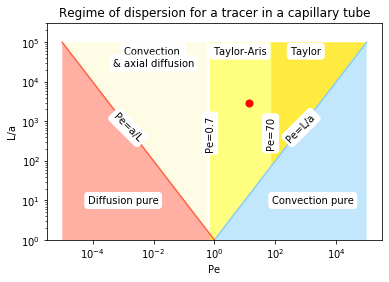

convection & diffusion axiale et radiale : Dispersion de Taylor-Aris
Coefficient de dispersion : 8.83e-09 m2/s


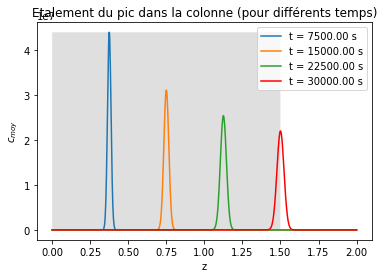

Etalement du pic en sortie 0.0921 m


In [132]:
#Expérience de Taylor u=0.05 mm/s
n0=1.
a=5e-4
L=1.5
D=1.87e-9
U=5e-5
Pe=U*a/D
plotPe()
plt.scatter(Pe,L/a,c='red',s=50)
plt.show()
#Recherche du régime de transport et calcul du coefficient de dispersion
if Pe>L/a :
    print ('convection pure')
elif Pe<a/L:
    print ('convection pure')
else:
    if Pe<0.7:
        print ('convection & diffusion axiale')
        D_eff=D
    if Pe>70:
        print ('convection & diffusion radiale : Dispersion de Taylor')
        D_eff=D*Pe**2/48
    else:
        print ('convection & diffusion axiale et radiale : Dispersion de Taylor-Aris')
        D_eff=D*(1+Pe**2/48)
print ('Coefficient de dispersion :',"%.2e"%D_eff, 'm2/s')

ts=L/U

from scipy.stats import norm
#norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)
z=np.linspace(0,2,1000)

def cmoy(z,t):
    sigma=np.sqrt(2*D_eff*t)
    x=(z-U*t)/sigma
    return norm.pdf(x)*(n0/(np.pi*a**2))/sigma

ts1=0.25*ts
ts2=0.5*ts
ts3=0.75*ts
plt.plot(z,cmoy(z,ts/4), label='t = %.2f s' %ts1)
plt.plot(z,cmoy(z,ts/2), label='t = %.2f s' %ts2)
plt.plot(z,cmoy(z,3*ts/4), label='t = %.2f s' %ts3)
plt.plot(z,cmoy(z,ts),'red', label='t = %.2f s' %ts)
plt.fill_between(z,max(cmoy(z,ts/4)), where=z<L, facecolor='silver', alpha=0.5)
plt.title('Etalement du pic dans la colonne (pour différents temps)')
plt.xlabel('z (m)')
plt.ylabel('$c_{moy}$ (mol/m3)')
plt.legend(loc='best')
plt.show()

print ('Etalement du pic en sortie', round(4*np.sqrt(2*D_eff*ts), 4), 'm')

**2. Déterminer l’étalement si la vitesse dans le tube est de 0,5 mm/s. Expliquer physiquement la différence.**

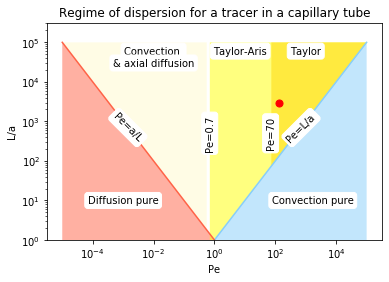

convection & diffusion radiale : Dispersion de Taylor
Coefficient de dispersion : 6.96e-07 m2/s


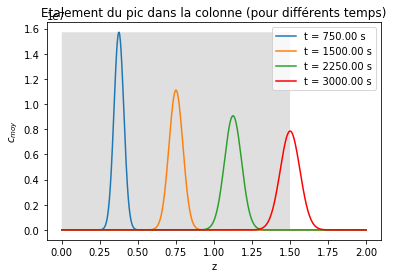

Etalement du pic en sortie 0.2585 m


In [131]:
#Expérience de Taylor u=0.5 mm/s
n0=1.
a=5e-4
L=1.5
D=1.87e-9
U=5e-4
Pe=U*a/D
plotPe()
plt.scatter(Pe,L/a,c='red',s=50)
plt.show()
#Recherche du régime de transport et calcul du coefficient de dispersion
if Pe>L/a :
    print ('convection pure')
elif Pe<a/L:
    print ('convection pure')
else:
    if Pe<0.7:
        print ('convection & diffusion axiale')
        D_eff=D
    if Pe>70:
        print ('convection & diffusion radiale : Dispersion de Taylor')
        D_eff=D*Pe**2/48
    else:
        print ('convection & diffusion axiale et radiale : Dispersion de Taylor-Aris')
        D_eff=D*(1+Pe**2/48)
print ('Coefficient de dispersion :',"%.2e"%D_eff, 'm2/s')

ts=L/U

ts1=0.25*ts
ts2=0.5*ts
ts3=0.75*ts
plt.plot(z,cmoy(z,ts/4), label='t = %.2f s' %ts1)
plt.plot(z,cmoy(z,ts/2), label='t = %.2f s' %ts2)
plt.plot(z,cmoy(z,3*ts/4), label='t = %.2f s' %ts3)
plt.plot(z,cmoy(z,ts),'red', label='t = %.2f s' %ts)
plt.title('Etalement du pic dans la colonne (pour différents temps)')
plt.fill_between(z,max(cmoy(z,ts/4)), where=z<L, facecolor='silver', alpha=0.5)
plt.xlabel('z')
plt.ylabel('$c_{moy}$')
plt.legend(loc='best')
plt.show()

print ('Etalement du pic en sortie', round(4*np.sqrt(2*D_eff*ts), 4), 'm')

>On note que l'**augmentation de la vitesse** dans la colonne conduit à une dispersion plus importante en sortie du tube. Cela peut apparaître contre-intuitif puisque on peut espérer qu'une augmentation de vitesse (et donc une diminution du temps de séjour) devrait conduire à une diffusion moins importante. C'est ce que pensait Taylor avant de faire son expérience en 1953 !
>
>L'augmentation de la dispersion avec la vitesse est du au fait que la vitesse dans le tube conduit à l'étalement (étirement) du traceur : en régime laminaire les vitesses sont lentes près des parois et maximales au centre du tube. Cet étirement induit également des variations de concentration du traceur en fonction du rayon. La diffusion radiale peut alors aussi participer à la diffusion du traceur. Dans ces régimes, la dispersion devient plus importante quand la vitesse augmente : la dispersion est proportionnelle au Péclet (et donc à la vitesse) au carré. 
>
>C'est donc un couplage entre la **convection, la diffusion axiale et la diffusion radiale** qui permet de comprendre et prévoir la dispersion d'un traceur dans un tube.

Pour en savoir plus https://onlinelibrary.wiley.com/doi/book/10.1002/0471725137 disponible à la BU en plusieurs exemplaires